##In this example I am going to implement stock price prediction using LSTM, VAE and GANs to predict a univariate sequence.


##The 2 features on which this will be performed are Close price and Exponential Close Price.

#RESULTS
Feature selected: Close price pct

Neural Network : 0.019656648859381676

LSTM with attention: 0.019144956022500992

Encoder-Decoder with LSTM: 0.01910853013396263

Using GANs : 0.019043496045988224

###Import libraries and data

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 KB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218921 sha256=20b52bd8324cc0f55cf29962ecfa9bfb55c45fab647676025d1e6896753ff03b
  Stored in directory: /root/.cache/pip/wheels/1e/5c/47/759b32beb377aee150eb4c1f1b2b7635032cc19ea09ce076fd
Successfully built pandas_ta


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr
import pandas_ta as pta
import matplotlib.pyplot as plt


In [ ]:
df = pdr.get_data_yahoo("IBM", start="1950-02-01", end="2022-07-13")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head(5), df.shape

(                Open      High       Low     Close  Adj Close  Volume
 Date                                                                 
 1962-01-02  7.374124  7.374124  7.291268  7.291268   1.613218  407940
 1962-01-03  7.291268  7.355003  7.291268  7.355003   1.627320  305955
 1962-01-04  7.355003  7.355003  7.278521  7.281708   1.611102  274575
 1962-01-05  7.272148  7.272148  7.125558  7.138305   1.579375  384405
 1962-01-08  7.131931  7.131931  6.947100  7.004461   1.549761  572685,
 (15236, 6))

In [ ]:
df['EWMA'] = df['Close'].ewm(span=5).mean()
df['EWMA_pct'] = df['EWMA'].pct_change()*100
df['Close_pct'] = df['Close'].pct_change()*100

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,EWMA,EWMA_pct,Close_pct
Date,,,,,,,,,
1962-01-02,7.374124,7.374124,7.291268,7.291268,1.613218,407940,7.291268,NaN,NaN
1962-01-03,7.291268,7.355003,7.291268,7.355003,1.627320,305955,7.329509,0.524477,0.874128
1962-01-04,7.355003,7.355003,7.278521,7.281708,1.611102,274575,7.306866,-0.308924,-0.996534
1962-01-05,7.272148,7.272148,7.125558,7.138305,1.579375,384405,7.236849,-0.958245,-1.969354
1962-01-08,7.131931,7.131931,6.947100,7.004461,1.549761,572685,7.147638,-1.232725,-1.875016


In [ ]:
buffer_df = df[1:]
df = buffer_df
df.head()

,Open,High,Low,Close,Adj Close,Volume,EWMA,EWMA_pct,Close_pct
Date,,,,,,,,,
1962-01-03,7.291268,7.355003,7.291268,7.355003,1.627320,305955,7.329509,0.524477,0.874128
1962-01-04,7.355003,7.355003,7.278521,7.281708,1.611102,274575,7.306866,-0.308924,-0.996534
1962-01-05,7.272148,7.272148,7.125558,7.138305,1.579375,384405,7.236849,-0.958245,-1.969354
1962-01-08,7.131931,7.131931,6.947100,7.004461,1.549761,572685,7.147638,-1.232725,-1.875016
1962-01-09,7.036329,7.176546,7.036329,7.087317,1.568093,517770,7.125596,-0.308384,1.182906


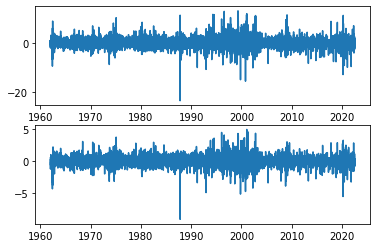

In [ ]:
fig, axs = plt.subplots(2)
axs[0].plot(df['Close_pct'])
axs[1].plot(df['EWMA_pct'])

### Clip the outliers, take only +5 and -5 as boundary for data

In [ ]:
df['Close_pct'] = np.where(df['Close_pct']>5, 5, df['Close_pct'])
df['EWMA_pct'] = np.where(df['EWMA_pct']>5, 5, df['EWMA_pct'])
df['Close_pct'] = np.where(df['Close_pct']<-5, -5, df['Close_pct'])
df['EWMA_pct'] = np.where(df['EWMA_pct']<-5, -5, df['EWMA_pct'])

<ipython-input-14-ffcc2d47b757>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close_pct'] = np.where(df['Close_pct']>5, 5, df['Close_pct'])
<ipython-input-14-ffcc2d47b757>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EWMA_pct'] = np.where(df['EWMA_pct']>5, 5, df['EWMA_pct'])
<ipython-input-14-ffcc2d47b757>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

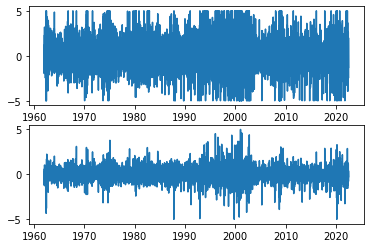

In [ ]:
fig, axs = plt.subplots(2)
axs[0].plot(df['Close_pct'])
axs[1].plot(df['EWMA_pct'])

In [ ]:
x_close_pct = np.array(df['Close_pct'])
x_ema_pct = np.array(df['EWMA_pct'])

x_close_pct.shape, x_ema_pct.shape

((15235,), (15235,))

###Create input sequence and expected output sequence

In [ ]:
import math
from sklearn.preprocessing import MinMaxScaler
#Split the data

training_data_len = math.ceil( x_close_pct.shape[0] *.8)
x_close_pct_train = np.reshape(x_close_pct[:training_data_len], (-1,1))
x_close_pct_test = np.reshape(x_close_pct[training_data_len:], (-1,1))
x_ema_pct_train = np.reshape(x_ema_pct[:training_data_len], (-1,1))
x_ema_pct_test = np.reshape(x_ema_pct[training_data_len:], (-1,1))

#Scale the data
scaler_close = MinMaxScaler()
scaler_ema = MinMaxScaler()
scaler_close = scaler_close.fit(x_close_pct_train)
scaler_ema = scaler_ema.fit(x_ema_pct_train)
x_close_pct_training_scaled = scaler_close.transform(x_close_pct_train)
x_close_pct_testing_scaled = scaler_close.transform(x_close_pct_test)
x_ema_pct_training_scaled = scaler_ema.transform(x_ema_pct_train)
x_ema_pct_testing_scaled = scaler_ema.transform(x_ema_pct_test)

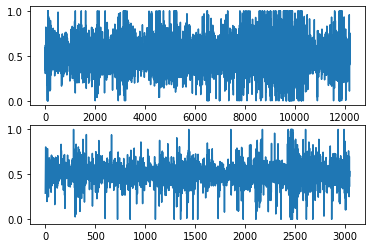

In [ ]:
fig, axs = plt.subplots(2)
axs[0].plot(x_close_pct_training_scaled)
axs[1].plot(x_close_pct_testing_scaled)

In [ ]:
x_close_pct_training_scaled.shape, x_ema_pct_training_scaled.shape, x_ema_pct_testing_scaled.shape, x_close_pct_testing_scaled.shape

((12188, 1), (12188, 1), (3047, 1), (3047, 1))

In [ ]:
#Create training data

x_train = []
y_train = []

training_base_feature = x_close_pct_training_scaled
testing_base_feature = x_close_pct_testing_scaled
scaler = scaler_close

training_data_size = training_base_feature.shape[0]
in_seq_len = 50
out_seq_len = 5

for i in range(50, training_data_size - out_seq_len):
  x_train.append(training_base_feature[i-in_seq_len:i])
  y_train.append(training_base_feature[i:i+out_seq_len])

x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape, y_train.shape)

(12133, 50, 1) (12133, 5, 1)


In [ ]:
#Create testing data

x_test = []
y_test = []

training_data_size = testing_base_feature.shape[0]
in_seq_len = 50
out_seq_len = 5

for i in range(50, training_data_size - out_seq_len):
  x_test.append(testing_base_feature[i-in_seq_len:i])
  y_test.append(testing_base_feature[i:i+out_seq_len])

x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_test.shape, y_test.shape)

(2992, 50, 1) (2992, 5, 1)


In [ ]:
print(x_train.shape, y_train.shape)

(12133, 50, 1) (12133, 5, 1)


###Create Neural Network Model

In [ ]:
# print(x_train.shape, y_train.shape)
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]))
# y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1]))
# print(x_train.shape, y_train.shape)

(8505, 50, 1) (8505, 5, 1)
(8505, 50) (8505, 5)


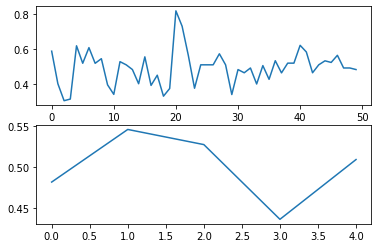

In [ ]:
fig, axs = plt.subplots(2)
axs[0].plot(x_train[0])
axs[1].plot(y_train[0])

In [ ]:
from keras import Model
from keras.layers import Layer
from keras.layers import Input, Dense, Reshape
import keras.backend as K
import keras
from keras.callbacks import EarlyStopping
import tensorflow as tf

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 3)

def get_nn_model():
    x=Input(shape=(x_train.shape[1:]))
    conv_x = keras.layers.Conv1D(1, 5, activation='relu')(x)
    reshaped_conv =  tf.reshape(conv_x, shape=(-1,46))
    dense2=Dense(100, trainable=True, activation='relu')(reshaped_conv)
    dense3=Dense(25, trainable=True, activation='relu')(dense2)
    outputs=Dense(5, trainable=True, activation='linear')(dense3)
    model=Model(x,outputs)
    model.compile(loss='mse', optimizer='adam')
    return model


nn_model = get_nn_model()

nn_model.summary()
# , callbacks=[es]
nn_model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=2, validation_split=0.2, callbacks=[es])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 46, 1)             6         
                                                                 
 tf.reshape_1 (TFOpLambda)   (None, 46)                0         
                                                                 
 dense_4 (Dense)             (None, 100)               4700      
                                                                 
 dense_5 (Dense)             (None, 25)                2525      
                                                                 
 dense_6 (Dense)             (None, 5)                 130       
                                                                 
Total params: 7,361
Trainable params: 7,361
Non-trainable p

In [ ]:
x_test.shape

(2992, 50, 1)

In [ ]:
prediction = nn_model.predict(x_test)

94/94 [==============================] - 0s 2ms/step


In [ ]:
prediction.shape

(2992, 5)

In [ ]:
mse_counter = 0
for i in range(0, x_test.shape[0]):
  input = x_test[i]
  example_mse = (np.reshape(prediction[i], (-1,1)) - y_test[i])**2
  mse = np.sum(example_mse)/5
  mse_counter += mse

print("total mse: ", mse_counter/ x_test.shape[0])

total mse:  0.017776745178074305


In [ ]:
nn_model.evaluate(x_test, y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.0178


0.017776748165488243

(5, 1)
1/1 [==============================] - 0s 21ms/step


Text(0.5, 1.0, 'Predicted sequence')

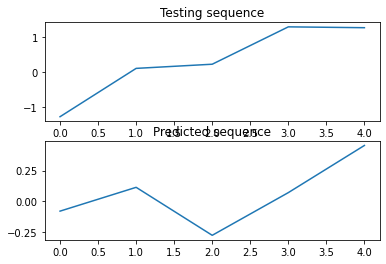

In [ ]:
n = 15

test_output = y_test[n]

test_output = scaler.inverse_transform(test_output)

print(test_output.shape)

predicted_output = nn_model.predict(np.reshape(x_test[n], (1,x_test[6].shape[0], x_test[6].shape[1])))
predicted_output = np.reshape(scaler.inverse_transform(predicted_output), (out_seq_len, 1))

fig, axs = plt.subplots(2)
axs[0].plot(test_output)
axs[0].set_title('Testing sequence')
axs[1].plot(predicted_output)
axs[1].set_title('Predicted sequence')

###Create a LSTM model


In [ ]:
x_train.shape, y_train.shape

((12133, 50, 1), (12133, 5, 1))

In [ ]:
from keras import Model
from keras.layers import Layer
from keras.layers import Input, Dense, LSTM
import keras.backend as K

class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1),
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1),
                               initializer='zeros', trainable=True)
        super(attention, self).build(input_shape)

    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

In [ ]:
import keras
from keras import layers

def create_LSTM_with_attention(hidden_units, dense_units):
    x=Input(shape=(x_train.shape[1:]))
    conv_x = keras.layers.Conv1D(30, 3, activation='relu')(x)
    conv_att = layers.MultiHeadAttention(
        key_dim=2, num_heads=5
    )(conv_x, conv_x)
    batchnorm_reshaped_attention = keras.layers.BatchNormalization()(conv_att)
    lstm_layer = LSTM(100, return_sequences=True, activation='relu')(batchnorm_reshaped_attention)
    lstm_layer = LSTM(50, return_sequences=False, activation='relu')(lstm_layer)
    outputs=Dense(5, trainable=True, activation='linear')(lstm_layer)
    model=Model(x,outputs)
    model.compile(loss='mse', optimizer='adam')
    return model

# Create the model with attention, train and evaluate
model_attention = create_LSTM_with_attention(hidden_units=100, dense_units=1)

model_attention.summary()
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 1)

model_attention.fit(x_train, y_train, epochs=15, batch_size=32, verbose=2, validation_split=0.2, callbacks = [es])

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 50, 1)]      0           []                               
                                                                                                  
 conv1d_4 (Conv1D)              (None, 48, 30)       120         ['input_5[0][0]']                
                                                                                                  
 multi_head_attention_2 (MultiH  (None, 48, 30)      1260        ['conv1d_4[0][0]',               
 eadAttention)                                                    'conv1d_4[0][0]']               
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 48, 30)      120         ['multi_head_attention_2[0]

In [ ]:
model_attention.evaluate(x_test,y_test)

94/94 [==============================] - 3s 27ms/step - loss: 0.0198


0.01981324329972267

In [ ]:
test_input = x_test[25]
test_output = y_test[25]

test_input = scaler.inverse_transform(test_input)
test_output = scaler.inverse_transform(test_output)

print(test_input.shape, test_output.shape)

(50, 1) (5, 1)


1/1 [==============================] - 0s 52ms/step


Text(0.5, 1.0, 'Predicted sequence')

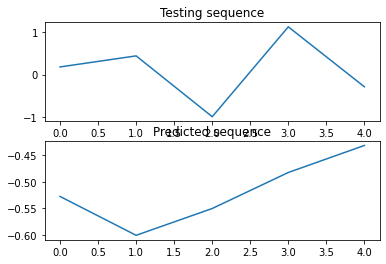

In [ ]:
predicted_output = model_attention.predict(np.reshape(x_test[25], (1,x_test[25].shape[0], x_test[25].shape[1])))
predicted_output = np.reshape(scaler.inverse_transform(predicted_output), (out_seq_len, 1))
fig, axs = plt.subplots(2)
axs[0].plot(test_output)
axs[0].set_title('Testing sequence')
axs[1].plot(predicted_output)
axs[1].set_title('Predicted sequence')

###Create VAE


In [ ]:
x_train.shape, y_train.shape

((12133, 50, 1), (12133, 5, 1))

In [ ]:
from keras import Input
from keras.models import Model
from keras import backend as K
from keras.layers import Conv1D, Conv1DTranspose, Flatten, Dense
from keras import layers
import keras

input_shape =  (x_train.shape[1], x_train.shape[2])
# Constructing encoder
encoder_input = Input(shape=input_shape)
encoded = layers.LSTM(5)(encoder_input)
# Constructing decoder
decoded = layers.RepeatVector(x_train.shape[1])(encoded)
decoded = layers.LSTM(y_train.shape[1], return_sequences=False)(decoded)
decoded_ouput = layers.Dense(5, activation = 'linear')

sequence_autoencoder = keras.Model(encoder_input, decoded)
sequence_autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 lstm_8 (LSTM)               (None, 5)                 140       
                                                                 
 repeat_vector_1 (RepeatVect  (None, 50, 5)            0         
 or)                                                             
                                                                 
 lstm_9 (LSTM)               (None, 5)                 220       
                                                                 
Total params: 360
Trainable params: 360
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sequence_autoencoder.compile(optimizer='adam', loss='mse')
sequence_autoencoder.fit(x_train, y_train, epochs=15, batch_size=32, verbose=2, validation_split=0.2, callbacks = [es])

Epoch 1/15
304/304 - 19s - loss: 0.0438 - val_loss: 0.0273 - 19s/epoch - 61ms/step
Epoch 2/15
304/304 - 12s - loss: 0.0219 - val_loss: 0.0273 - 12s/epoch - 40ms/step
Epoch 3/15
304/304 - 12s - loss: 0.0219 - val_loss: 0.0274 - 12s/epoch - 41ms/step
Epoch 3: early stopping


In [ ]:
sequence_autoencoder.evaluate(x_test,y_test)

94/94 [==============================] - 2s 15ms/step - loss: 0.0173


0.017343325540423393

In [ ]:
test_input = x_test[30]
test_output = y_test[30]

test_input = scaler.inverse_transform(test_input)
test_output = scaler.inverse_transform(test_output)

print(test_input.shape, test_output.shape)

(50, 1) (5, 1)


1/1 [==============================] - 0s 58ms/step


Text(0.5, 1.0, 'Predicted sequence')

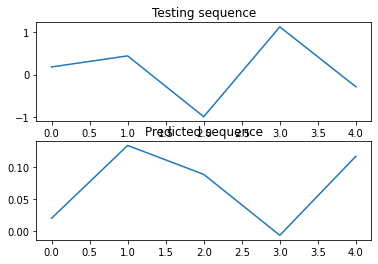

In [ ]:
predicted_output = sequence_autoencoder.predict(np.reshape(x_test[30], (1,x_test[25].shape[0], x_test[25].shape[1])))
predicted_output = np.reshape(scaler.inverse_transform(predicted_output), (out_seq_len, 1))
fig, axs = plt.subplots(2)
axs[0].plot(test_output)
axs[0].set_title('Testing sequence')
axs[1].plot(predicted_output)
axs[1].set_title('Predicted sequence')

###Create a GAN

In [ ]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)

In [ ]:
input_shape =  (x_train.shape[1], x_train.shape[2])
from keras.layers import LSTM, MultiHeadAttention, Conv1D


def get_generator_model():
    encoder_input = Input(shape=input_shape)
    conv_x = keras.layers.Conv1D(30, 3, activation='relu')(encoder_input)
    conv_att = layers.MultiHeadAttention(
        key_dim=2, num_heads=5
    )(conv_x, conv_x)
    batchnorm_reshaped_attention = keras.layers.BatchNormalization()(conv_att)
    lstm_layer = LSTM(100, return_sequences=True, activation='relu')(conv_x)
    lstm_layer = LSTM(50, return_sequences=False, activation='relu')(lstm_layer)
    outputs=Dense(5, trainable=True, activation='tanh')(lstm_layer)
    model = tf.keras.models.Model( encoder_input , outputs )

    return model


In [ ]:
from keras import layers
def get_discriminator_model():
    layers = [
        keras.layers.LSTM(5),
        keras.layers.Dense(5, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
    ]
    model = tf.keras.models.Sequential( layers )
    return model


In [ ]:
import tensorflow as tf

cross_entropy = tf.keras.losses.BinaryCrossentropy()
mse = tf.keras.losses.MeanSquaredError()

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output) - tf.random.uniform( shape=real_output.shape , maxval=0.1) , real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output) + tf.random.uniform( shape=fake_output.shape , maxval=0.1) , fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output , real_y):
    return mse( fake_output , real_y )

generator_optimizer = tf.keras.optimizers.Adam( 0.001 )
discriminator_optimizer = tf.keras.optimizers.Adam( 0.001 )

generator = get_generator_model()
discriminator = get_discriminator_model()

In [ ]:
losses = {"D":[], "G":[]}

gen_loss_tracker = keras.metrics.Mean(name="generator_loss")
disc_loss_tracker = keras.metrics.Mean(name="discriminator_loss")
@tf.function
def train_step( input_x , real_y ):

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # Generate an image -> G( x )
        generated_seq = generator( input_x , training=True)
        # Probability that the given image is real -> D( x )
        real_output = discriminator( real_y, training=True)
        # Probability that the given image is the one generated -> D( G( x ) )
        generated_output = discriminator(generated_seq, training=True)

        # L2 Loss -> || y - G(x) ||^2
        gen_loss = generator_loss( generated_seq , real_y )
        # Log loss for the discriminator
        disc_loss = discriminator_loss( real_output, generated_output )
        # losses["D"].append(disc_loss.numpy())
        # losses["G"].append(gen_loss.numpy())
    #tf.keras.backend.print_tensor( tf.keras.backend.mean( gen_loss ) )
    #tf.keras.backend.print_tensor( gen_loss + disc_loss )

    gen_loss_tracker.update_state(gen_loss)
    disc_loss_tracker.update_state(disc_loss)

    # print("gen loss", gen_loss_tracker.result())


    # Compute the gradients
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # Optimize with Adam
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    return gen_loss_tracker.result(), disc_loss_tracker.result()


generator.compile(
    optimizer=generator_optimizer,
    loss=generator_loss,
    metrics=['accuracy']
)

discriminator.compile(
    optimizer=discriminator_optimizer,
    loss=discriminator_loss,
    metrics=['accuracy']
)


In [ ]:
num_epochs = 20
losses = {"D":[], "G":[]}
for e in range( num_epochs ):
    print("Running epoch : ", e )
    gen_loss, disc_loss = train_step( x_train , y_train )
    losses["D"].append(disc_loss.numpy())
    losses["G"].append(gen_loss.numpy())
    print("generator loss for ", e, " epoch: ", gen_loss.numpy(), ", disc loss for ", e, " epoch: ",disc_loss.numpy())

Running epoch :  0
generator loss for  0  epoch:  0.047466733 , disc loss for  0  epoch:  1.3806096
Running epoch :  1
generator loss for  1  epoch:  0.04725064 , disc loss for  1  epoch:  1.3806524
Running epoch :  2
generator loss for  2  epoch:  0.04703833 , disc loss for  2  epoch:  1.3806953
Running epoch :  3
generator loss for  3  epoch:  0.0468297 , disc loss for  3  epoch:  1.3807378
Running epoch :  4
generator loss for  4  epoch:  0.04662465 , disc loss for  4  epoch:  1.3807793
Running epoch :  5
generator loss for  5  epoch:  0.04642309 , disc loss for  5  epoch:  1.3808192
Running epoch :  6
generator loss for  6  epoch:  0.046224933 , disc loss for  6  epoch:  1.3808588
Running epoch :  7
generator loss for  7  epoch:  0.046030086 , disc loss for  7  epoch:  1.380898
Running epoch :  8
generator loss for  8  epoch:  0.045838468 , disc loss for  8  epoch:  1.3809364
Running epoch :  9
generator loss for  9  epoch:  0.045649994 , disc loss for  9  epoch:  1.3809736
Running

Text(0.5, 1.0, 'Discriminator loss')

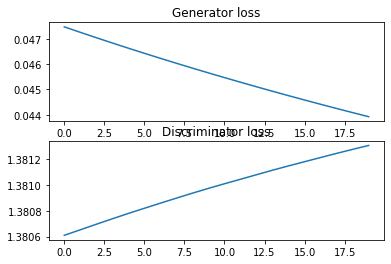

In [ ]:
fig, axs = plt.subplots(2)
axs[0].plot(losses["G"])
axs[0].set_title('Generator loss')
axs[1].plot(losses["D"])
axs[1].set_title('Discriminator loss')

In [ ]:
predictions = generator( x_test ).numpy()

In [ ]:
y_test.shape

(2992, 5, 1)

In [ ]:
mse_counter = 0
for i in range(0, predictions.shape[0]):
  example_mse = (np.reshape(predictions[i], (predictions[i].shape[0], 1)) - y_test[i])**2
  mse = np.sum(example_mse)/5
  mse_counter += mse

print("total mse: ", mse_counter/ predictions.shape[0])

total mse:  0.01747848920711438


In [ ]:
0.017567987550793782

(5, 1)
(5, 1)


Text(0.5, 1.0, 'Predicted sequence')

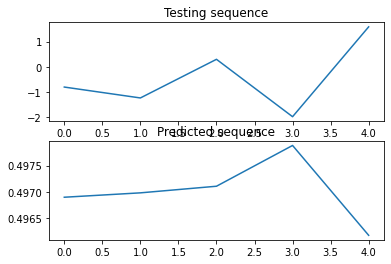

In [ ]:
n = 5

test_output = y_test[n]

test_output = scaler.inverse_transform(test_output)

print(test_output.shape)

predicted_output = predictions[n]
predicted_output_scaled = scaler.inverse_transform(np.reshape(predicted_output, (-1,1)))
print(predicted_output_scaled.shape)
fig, axs = plt.subplots(2)
axs[0].plot(test_output)
axs[0].set_title('Testing sequence')
axs[1].plot(predicted_output)
axs[1].set_title('Predicted sequence')